In [1]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
# group time-series data into a specified frequency, such as daily, weekly, or monthly
#再分组
from pandas import Grouper #groupby

#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm #用各种统计学方法先用它

from statsmodels.graphics.tsaplots import plot_acf #用来画autocorrelation plot

from statsmodels.tsa.api import SimpleExpSmoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing

from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise

from random import seed
from pandas import Series 

In [206]:
yf.pdr_override()
# the stock I choose is Disney 
stock_ticker = 'DIS'

stock_start_date = datetime.date(2013, 1, 1)
stock_end_date = datetime.date.today()
stock_df_disney = pdr.get_data_yahoo(stock_ticker,start=stock_start_date,end=stock_end_date)
stock_df_disney=stock_df_disney.dropna()
stock_df_disney

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,50.799999,51.250000,50.639999,51.099998,46.454639,11674700
2013-01-03,51.049999,51.340000,50.840000,51.209999,46.554649,7566600
2013-01-04,51.380001,52.340000,51.330002,52.189999,47.445557,8745900
2013-01-07,51.759998,51.759998,50.660000,50.970001,46.336460,9472100
2013-01-08,50.880001,51.180000,50.570000,50.759998,46.145557,8637600
...,...,...,...,...,...,...
2023-03-23,95.279999,97.019997,94.760002,95.830002,95.830002,9527000
2023-03-24,94.809998,95.000000,93.019997,94.080002,94.080002,9534600
2023-03-27,94.779999,96.019997,94.379997,95.620003,95.620003,7487900


In [207]:
#inflation
from urllib.request import urlopen  
from bs4 import BeautifulSoup

html = urlopen('https://www.usinflationcalculator.com/inflation/current-inflation-rates/')

infl = BeautifulSoup(html.read(), "lxml")

table_list = infl.findAll('table')
table = table_list[0]
rows = table.findAll('tr')
dict_1={}
for r in rows[2:12]:
    cells=r.findAll('td')
    year=cells[0].find('strong')
    year=year.contents[0]
    i=1
    for c in cells [1:13]:
        rate=c.contents[0]
        key = f"{year}-{i:02d}" #02d 把i换成一个两位数，用0补位
        dict_1[key]=rate
        i=i+1
dict_infl={}
dict_infl['2023-01']=6.0
dict_infl['2023-02']=6.4
dict_infl.update(dict_1)
infl=pd.DataFrame(list(dict_infl.items()), columns=['date', 'inflation rate'])
infl=infl.iloc[::-1].reset_index(drop=True)
infl = infl.set_index('date')
infl


,inflation rate
date,
2013-12,1.5
2013-11,1.2
2013-10,1.0
2013-09,1.2
2013-08,1.5
...,...
2022-03,8.5
2022-02,7.9
2022-01,7.5


In [208]:
#median income
list_inc=[[2013,53657],[2014,56516],[2015, 59039],[2016, 61372],[2017, 61136], [2018, 63179],
[2019, 68703], [2020, 68010], [2021, 70784], [2022, 54132]]
inco=pd.DataFrame(list_inc, columns=['date', 'average income'])
inco = inco.set_index('date')
inco

,average income
date,
2013,53657
2014,56516
2015,59039
2016,61372
2017,61136
2018,63179
2019,68703
2020,68010
2021,70784


In [209]:
#average movie ticket price
list_tick=[[2013,8.13],[2014,8.17],[2015, 8.43],[2016, 8.65],[2017, 8.97], [2018, 9.11],
[2019, 9.16], [2020, 9.41], [2021, 10.4], [2022, 10.45], [2023, 10.45]]
tick_p=pd.DataFrame(list_tick, columns=['date', 'average movie ticket price'])
tick_p = tick_p.set_index('date')
tick_p

,average movie ticket price
date,
2013,8.13
2014,8.17
2015,8.43
2016,8.65
2017,8.97
2018,9.11
2019,9.16
2020,9.41
2021,10.40


In [210]:
#resample stock price to month 
stock_df_disney_resample_months = stock_df_disney.groupby(pd.Grouper(freq='MS')).median()
stock_df_disney_resample_months.index = stock_df_disney_resample_months.index.strftime('%Y-%m')
stock_df_disney_resample_months

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01,51.759998,52.340000,51.330002,52.189999,47.445557,8389000.0
2013-02,54.580002,54.869999,54.310001,54.590000,49.627380,8460700.0
2013-03,56.620001,57.074999,56.415001,56.705000,51.550110,6374900.0
2013-04,60.254999,60.679998,59.950001,60.549999,55.045570,8269550.0
2013-05,65.990002,66.530003,65.389999,66.029999,60.027401,8563550.0
...,...,...,...,...,...,...
2022-11,96.000000,97.940002,94.680000,96.209999,96.209999,13660000.0
2022-12,92.370003,92.790001,90.120003,90.489998,90.489998,12608100.0
2023-01,99.829998,100.809998,98.365002,99.605000,99.605000,11179050.0


In [211]:
#resample stock price to year
stock_df_disney_resample_year = stock_df_disney.groupby(pd.Grouper(freq='Y')).median()
stock_df_disney_resample_year.index = stock_df_disney_resample_year.index.strftime('%Y')
stock_df_disney_resample_year

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013,64.115002,64.769997,63.630001,63.990000,58.172852,7173550.0
2014,84.830002,85.564999,84.219997,84.904999,78.139450,6218300.0
2015,107.989998,108.680000,107.110001,107.985001,101.041054,6786000.0
2016,97.564999,98.189999,96.869999,97.660004,92.287613,7051150.0
2017,107.139999,107.739998,106.519997,107.089996,102.886719,6492700.0
2018,109.820000,110.500000,108.879997,109.650002,107.374275,7337800.0
2019,133.510002,134.650002,132.510002,133.514999,132.295288,8482650.0
2020,124.580002,125.940002,123.279999,124.080002,124.080002,11424200.0
2021,177.044998,178.470001,175.565002,176.879997,176.879997,8386300.0


In [212]:
#join data: close price and inflation rate 
stock_c_m=stock_df_disney_resample_months['Close']
joined_data_infl = pd.merge(stock_c_m,infl,how='outer',left_on=stock_c_m.index,right_on=infl.index)
joined_data_infl = joined_data_infl.rename(columns={'key_0': 'date'})
joined_data_infl = joined_data_infl.set_index('date')
joined_data_infl=joined_data_infl.dropna()
joined_data_infl


,Close,inflation rate
date,,
2013-01,52.189999,1.6
2013-02,54.590000,2.0
2013-03,56.705000,1.5
2013-04,60.549999,1.1
2013-05,66.029999,1.4
...,...,...
2022-10,98.989998,7.7
2022-11,96.209999,7.1
2022-12,90.489998,6.5


In [213]:
#join data: close price and average income 
#注意index的数据格式要一样
stock_c_y=stock_df_disney_resample_year['Close']
stock_c_y.index=stock_c_y.index.astype(float)
joined_data_inco = pd.merge(stock_c_y,inco,how='outer',left_on=stock_c_y.index,right_on=inco.index)
joined_data_inco=joined_data_inco.rename(columns={'key_0': 'date'}).set_index('date').dropna()
joined_data_inco.index=joined_data_inco.index.astype(int)
joined_data_inco

,Close,average income
date,,
2013,63.990000,53657.0
2014,84.904999,56516.0
2015,107.985001,59039.0
2016,97.660004,61372.0
2017,107.089996,61136.0
2018,109.650002,63179.0
2019,133.514999,68703.0
2020,124.080002,68010.0
2021,176.879997,70784.0


In [214]:
#join data: close price and average movie ticket price
joined_data_tick = pd.merge(stock_c_y,tick_p,how='outer',left_on=stock_c_y.index,right_on=tick_p.index)
joined_data_tick=joined_data_tick.rename(columns={'key_0': 'date'}).set_index('date').dropna()
joined_data_tick.index=joined_data_tick.index.astype(int)
joined_data_tick

,Close,average movie ticket price
date,,
2013,63.990000,8.13
2014,84.904999,8.17
2015,107.985001,8.43
2016,97.660004,8.65
2017,107.089996,8.97
2018,109.650002,9.11
2019,133.514999,9.16
2020,124.080002,9.41
2021,176.879997,10.40


In [215]:
#correlation : close price and inflation rate 
joined_data_infl['Close'] = joined_data_infl['Close'].astype(float)
joined_data_infl['inflation rate'] = joined_data_infl['inflation rate'].astype(float)
np.corrcoef(joined_data_infl['Close'], joined_data_infl['inflation rate'])


array([[1.        , 0.30943202],
       [0.30943202, 1.        ]])

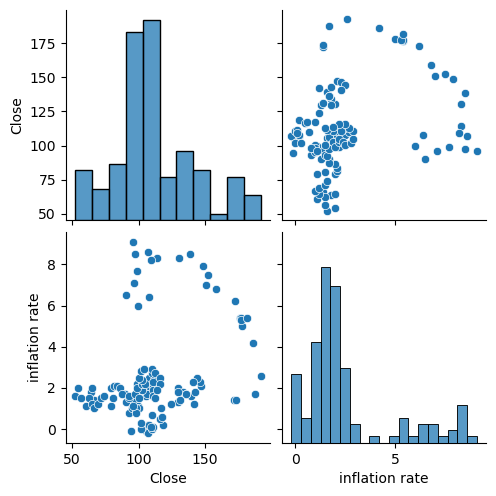

In [216]:
#solve picture doesn't appear problem

%matplotlib inline
sns.pairplot(joined_data_infl)

In [217]:
joined_data_inco['Close'] = joined_data_inco['Close'].astype(float)
joined_data_inco['average income'] = joined_data_inco['average income'].astype(float)
np.corrcoef(joined_data_inco['Close'], joined_data_inco['average income'])


array([[1.        , 0.84845232],
       [0.84845232, 1.        ]])

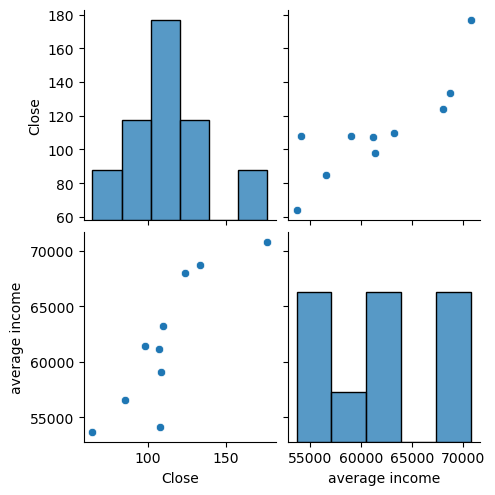

In [218]:
sns.pairplot(joined_data_inco)

In [219]:
joined_data_tick['Close'] = joined_data_tick['Close'].astype(float)
joined_data_tick['average movie ticket price'] = joined_data_tick['average movie ticket price'].astype(float)
np.corrcoef(joined_data_tick['Close'], joined_data_tick['average movie ticket price'])

array([[1.        , 0.59563414],
       [0.59563414, 1.        ]])

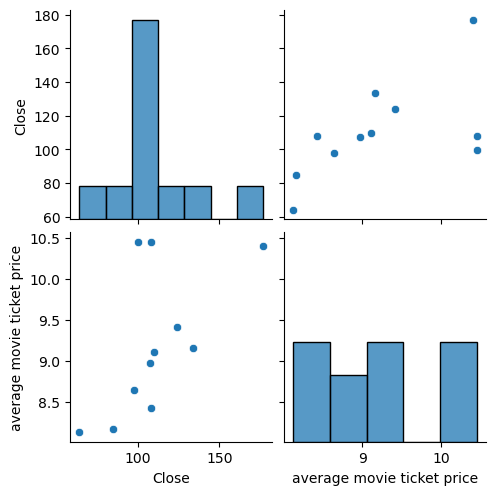

In [220]:
sns.pairplot(joined_data_tick)

In [267]:
stock_p_months = stock_df_disney.groupby(pd.Grouper(freq='MS')).median()
stock_p_c=stock_p_months['Close']
stock_p_c

Date
2013-01-01     52.189999
2013-02-01     54.590000
2013-03-01     56.705000
2013-04-01     60.549999
2013-05-01     66.029999
                 ...    
2022-11-01     96.209999
2022-12-01     90.489998
2023-01-01     99.605000
2023-02-01    107.660004
2023-03-01     95.620003
Freq: MS, Name: Close, Length: 123, dtype: float64

In [268]:
#split data 


from sklearn.model_selection import train_test_split
test_size = 12

train_data, test_data = train_test_split(stock_p_c, test_size=test_size, random_state=25, shuffle = False)


In [269]:
train_data

Date
2013-01-01     52.189999
2013-02-01     54.590000
2013-03-01     56.705000
2013-04-01     60.549999
2013-05-01     66.029999
                 ...    
2021-11-01    158.830002
2021-12-01    150.930000
2022-01-01    152.105003
2022-02-01    148.460007
2022-03-01    138.720001
Freq: MS, Name: Close, Length: 111, dtype: float64

In [270]:
test_data

Date
2022-04-01    130.559998
2022-05-01    106.980003
2022-06-01     95.919998
2022-07-01     97.305000
2022-08-01    114.070000
2022-09-01    109.169998
2022-10-01     98.989998
2022-11-01     96.209999
2022-12-01     90.489998
2023-01-01     99.605000
2023-02-01    107.660004
2023-03-01     95.620003
Freq: MS, Name: Close, dtype: float64

In [274]:
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])

In [275]:
ins_cast1

2022-04-01    156.457609
2022-05-01    156.457609
2022-06-01    156.457609
2022-07-01    156.457609
2022-08-01    156.457609
2022-09-01    156.457609
2022-10-01    156.457609
2022-11-01    156.457609
2022-12-01    156.457609
2023-01-01    156.457609
2023-02-01    156.457609
2023-03-01    156.457609
Freq: MS, Name: alpha=0.2, dtype: float64

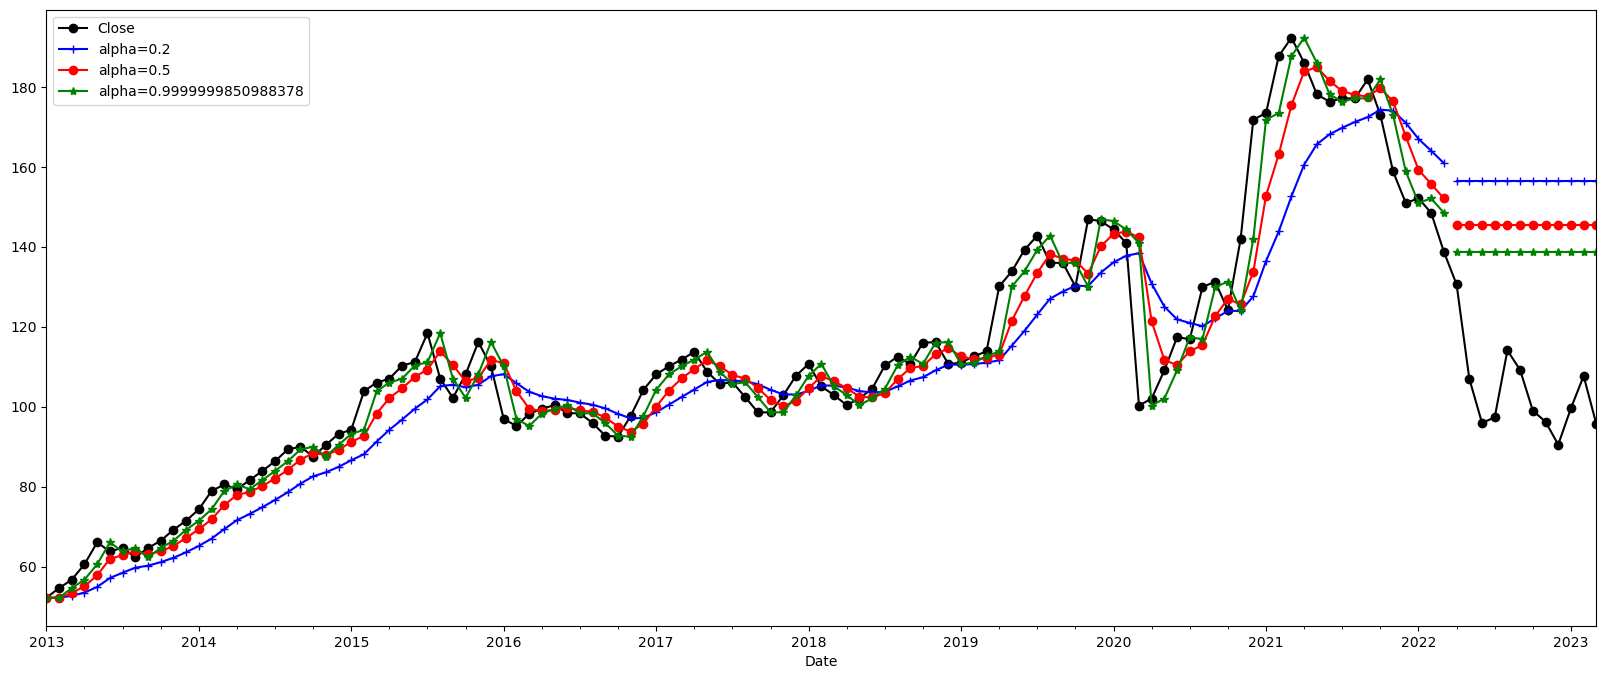

In [277]:
#After creating model we will visualize the plot
ax = stock_p_c.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.5
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

In [279]:
double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)

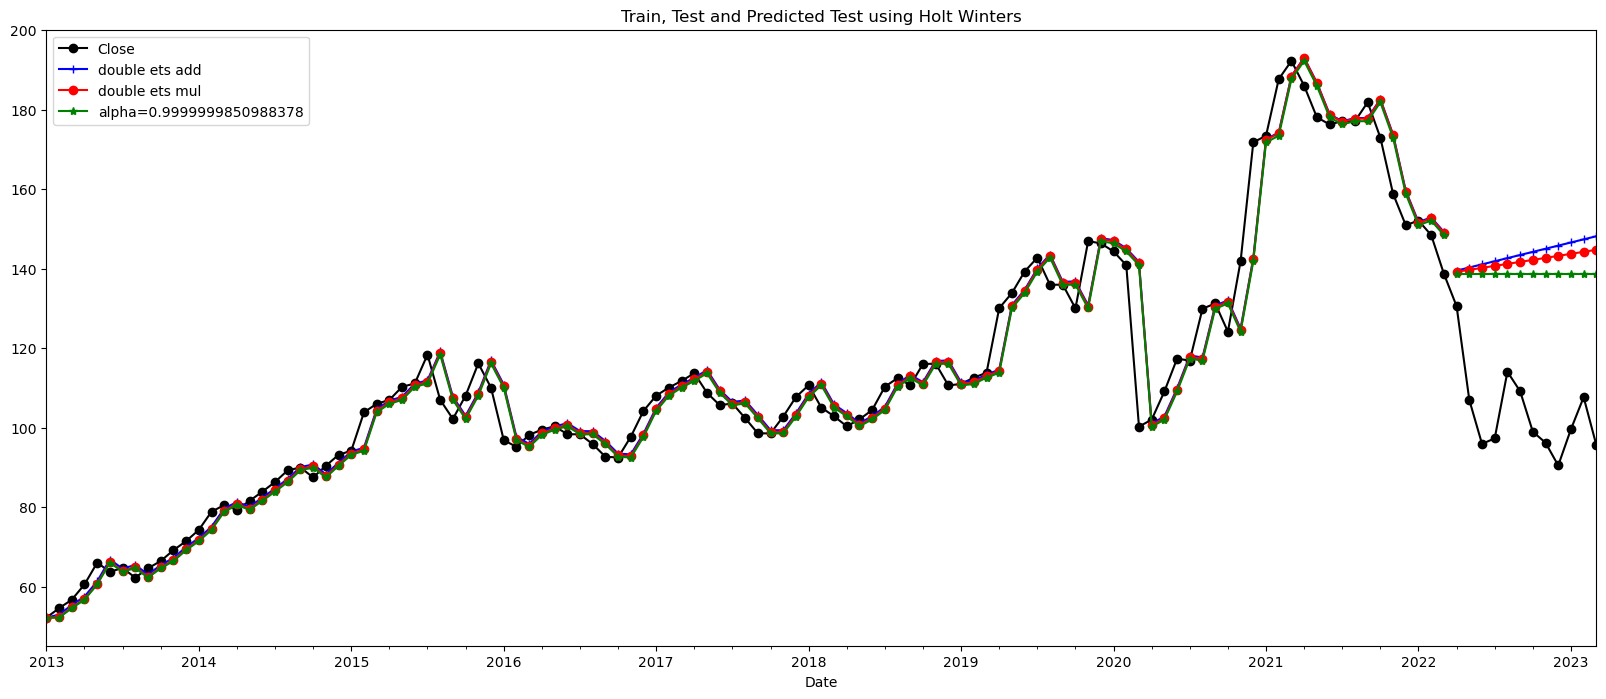

In [280]:
# Double ETS
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = stock_p_c.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()


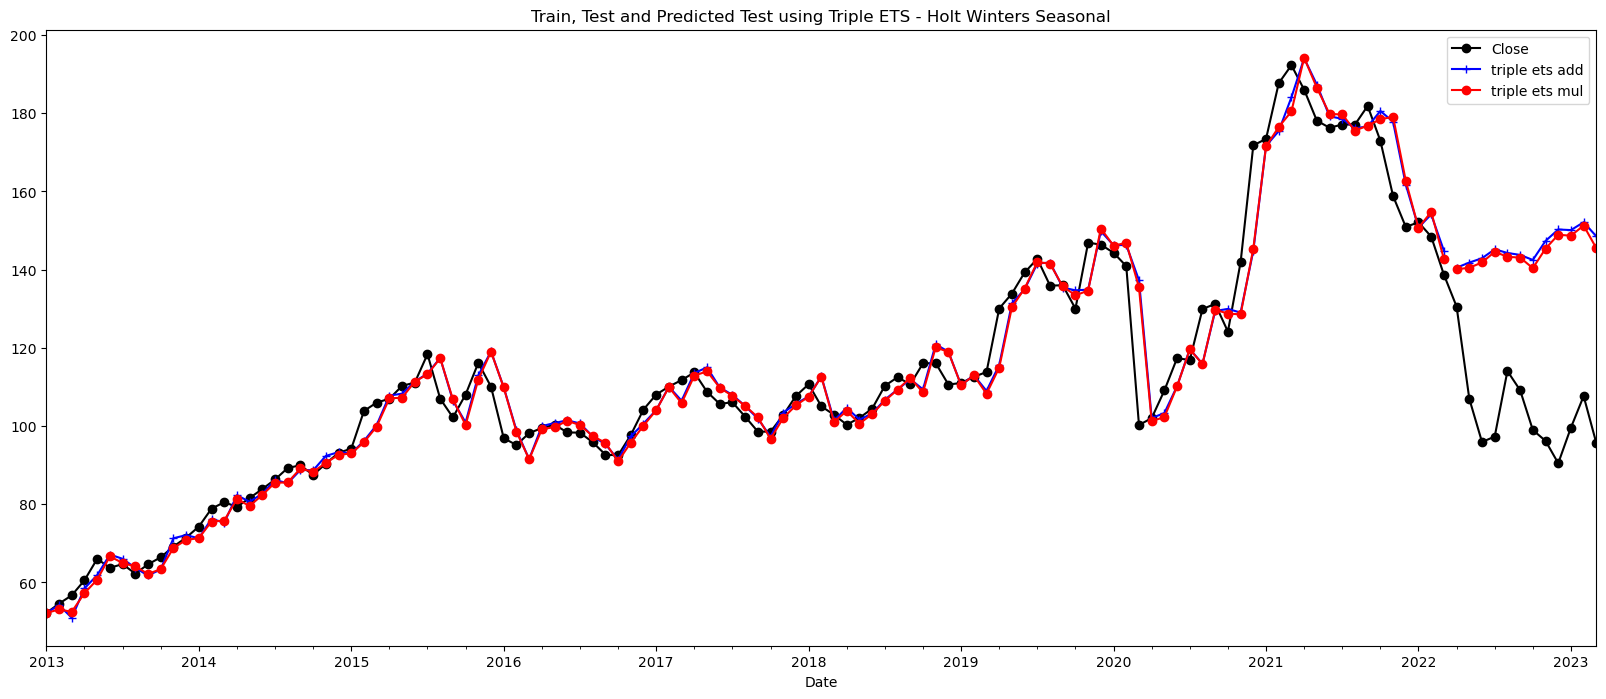

In [281]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)

#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = stock_p_c.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

In [282]:
#calculate residuals
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)
residuals

,0
0,-9.946831
1,-34.827884
2,-46.994737
3,-47.907374
4,-30.187605
5,-34.598078
6,-43.484241
7,-51.132312
8,-59.776806
9,-50.511200


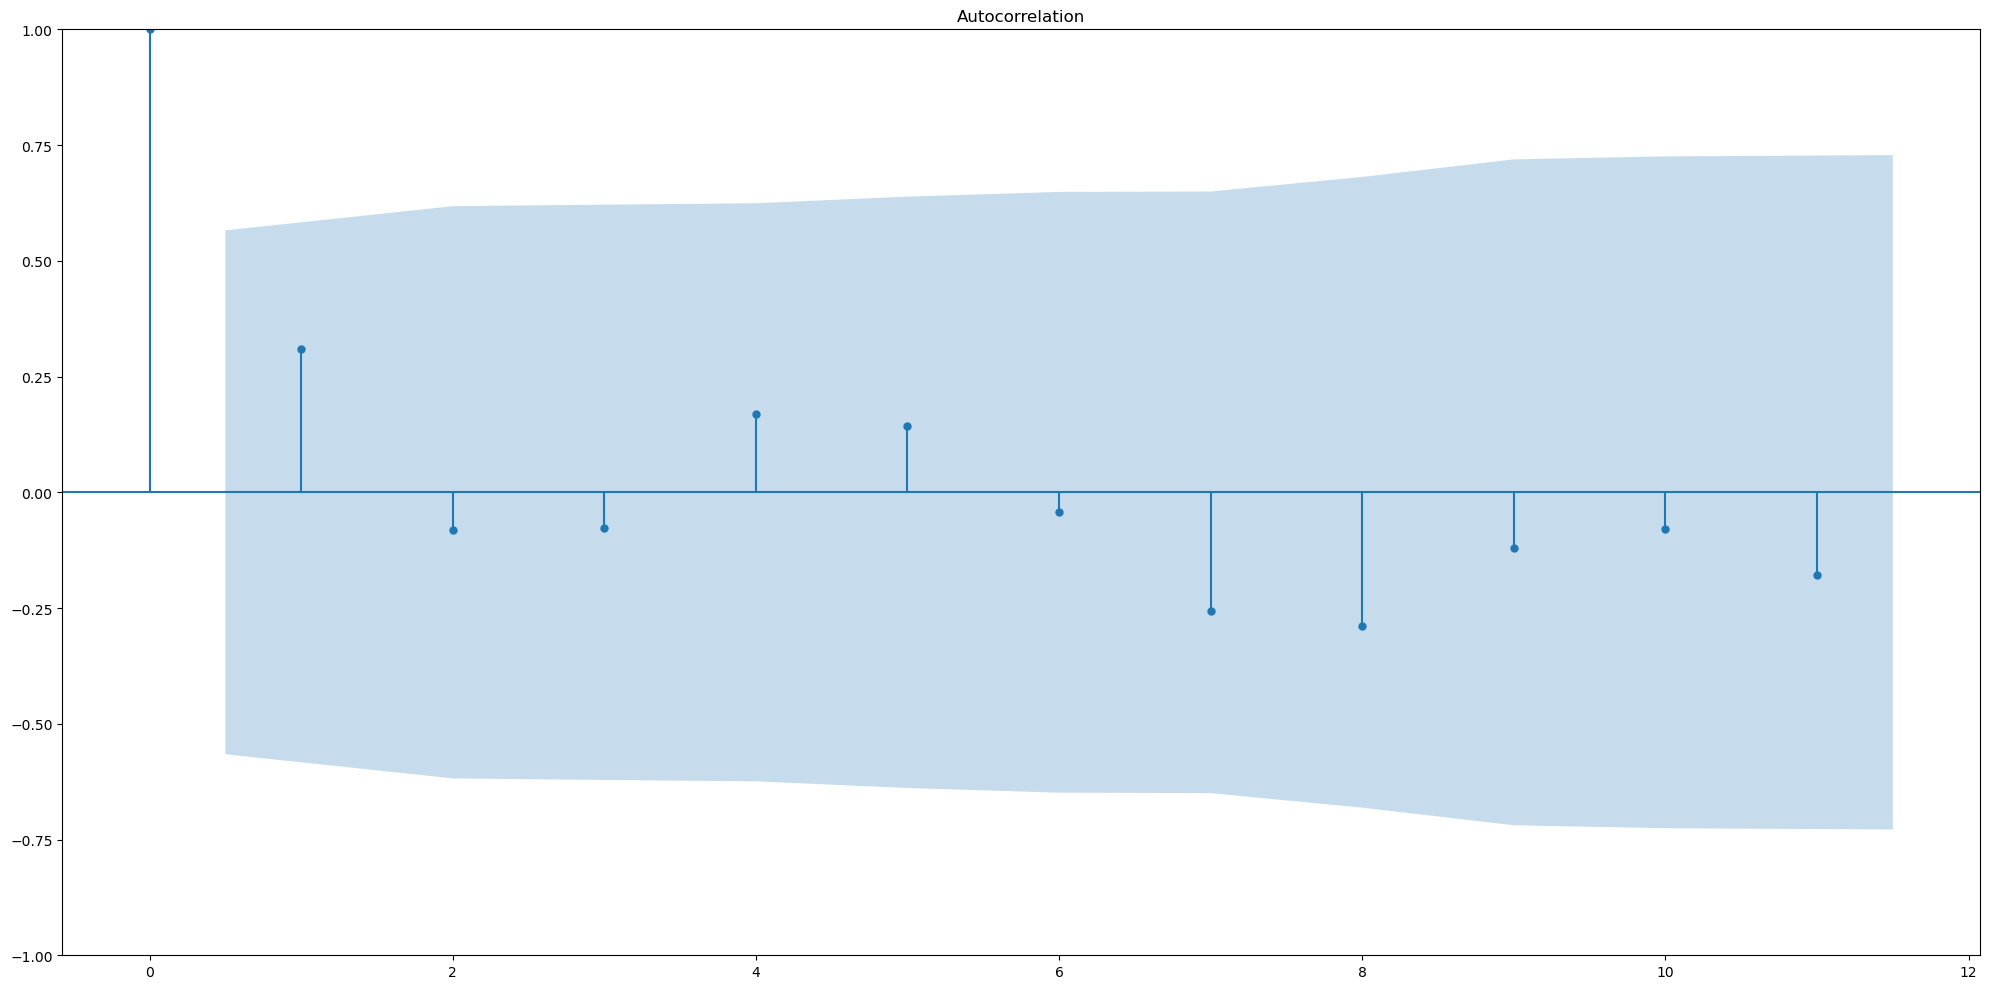

In [283]:
fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

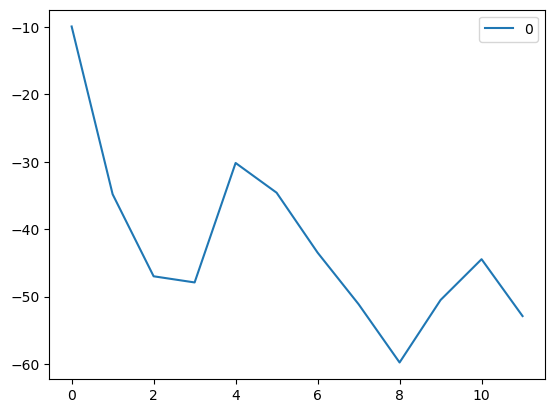

In [284]:
residuals.plot()
plt.show()

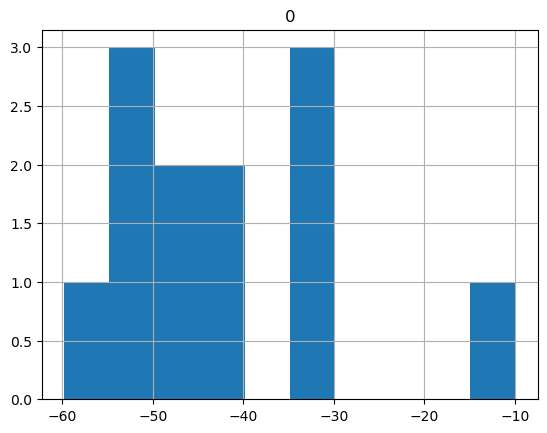

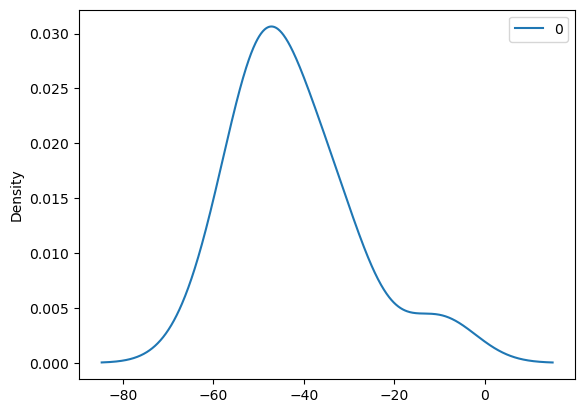

In [285]:
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

In [286]:
#define metrics dataframe which will be used below for 
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

                                 
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

In [287]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast1.values.flatten(), 
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast2.values.flatten(), 
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast3.values.flatten(), 
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_add_pred.values.flatten(), 
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_mul_pred.values.flatten(), 
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_add_pred.values.flatten(), 
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_mul_pred.values.flatten(), 
                                'Triple Mul')


/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_68866/3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_68866/3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_68866/3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
/var/folders/x2/mxmc_3t17mggrh5phqvl5l8r0000gn/T/ipykernel_68866/3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataf

In [288]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,Simple 1,36.703661,35.171668,35.216018
0,Double Mul,40.098355,38.417718,38.457954
0,Double Add,42.069791,40.284799,40.322084
0,Triple Mul,42.719346,40.906178,40.928335
0,Simple 0.5,43.142369,41.846763,41.722504
0,Triple Add,44.091342,42.226923,42.251546
0,Simple 0.2,53.939818,52.909276,52.505584


<AxesSubplot:>

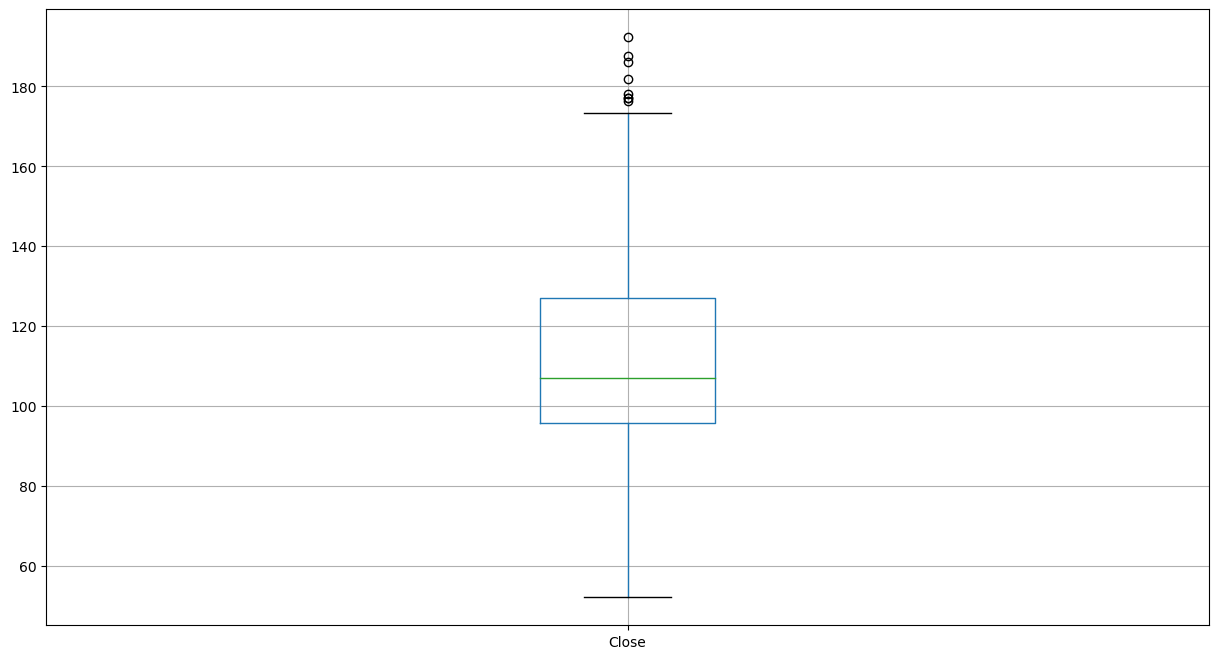

In [290]:
plt.figure(figsize=(15,8))
stock_p_c_df= stock_p_c.to_frame()
stock_p_c_df.boxplot()

In [292]:
variance = stock_p_c_df.var()
variance

Close    931.845789
dtype: float64

In [293]:
stock_p_c.describe()

count    123.000000
mean     111.467236
std       30.526149
min       52.189999
25%       95.895000
50%      106.980003
75%      127.037497
max      192.279999
Name: Close, dtype: float64